### Libraries

In [1]:
import pandas
import ipaddress as ip
import re

### Dataset

In [2]:
data = pandas.read_csv("final_dataset.csv").sample(frac=.1).reset_index(drop=True)
print(data)

                                                     url  label
0          http://quivering-paragraph.000webhostapp.com/      1
1      http://texashomeinspectorsguide.com/pspp/psp/p...      1
2                                 http://www.gameswf.com      0
3                               http://www.evflower.com/      0
4                                http://www.alt-arch.org      0
5                                http://www.sitemapx.net      0
6                           http://www.markaztamirat.com      0
7                        http://www.anandfoundation.com/      0
8      http://villaelina.com/includes/samples/express...      1
9                             http://www.zenithmedia.com      0
10                          http://www.guildmortgage.com      0
11           https://serviciosestetica.es/layouts/ub.php      1
12                   http://down.smalltool.cn/new/090527      1
13                                 http://www.leap.co.uk      0
14                                  http

### Feature Set

In [3]:
featureSet = pandas.DataFrame(columns=('URL_Length', 'Dots_Count', 'Suspicious_TLD', 'Hyphen_Count', 'Subdir_Count', 'Domain_Length', 'IP_Present','Double_Slash_Count', 'URL_Shortening_Service', 'Count_SubDomain (Domain_Tokens)', 'Count_Queries', 'Count_At_Symbol', 'Presence of %20', 'digit/letter', 'special_characters'))
featureSet

,URL_Length,Dots_Count,Suspicious_TLD,Hyphen_Count,Subdir_Count,Domain_Length,IP_Present,Double_Slash_Count,URL_Shortening_Service,Count_SubDomain (Domain_Tokens),Count_Queries,Count_At_Symbol,Presence of %20,digit/letter,special_characters


In [4]:
from urllib.parse import urlparse
import tldextract

suspicious_TLD = ['country' , 'kim' , 'science', 'gq', 'work', 'ninja', 'xyz', 'date', 'faith', 'zip', 'racing', 'cricket', 'win','space','accountant','realtor','top','stream','christmas','gdn','mom','pro','men']


shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
def is_ip(url):
    try:
        if ip.ip_address(url):
            return 1
    except:
            return 0
def count_subdomain(sub):
    if not sub:
        return 0
    else:
        return len(sub.split('.'))

def extract_features(url):
    vector = []
    path  = urlparse(url)
    ext = tldextract.extract(url)
    #print(path,ext)


    vector.append(len(url))
    vector.append(url.count('.'))
    vector.append(1 if ext.suffix in suspicious_TLD else 0)
    vector.append(url.count('-'))
    vector.append(path.path.count('/'))
    vector.append(len(path.netloc))
    vector.append(is_ip(url))
    vector.append(url.count('//'))
    vector.append(1 if re.search(shortening_services, url) else 0)
    vector.append(count_subdomain(ext.subdomain))
    vector.append(path.query.count('='))
    vector.append(url.count('@'))
    vector.append(0 if path.path.find('%20')==-1 else 1)
    d=l=spc=0
    for c in url:
        if c.isdigit():
            d=d+1
        elif c.isalpha():
            l=l+1
        else:
            pass
    for c in path.path:
        if c.isdigit():
            pass
        elif c.isalpha():
            pass
        else:
            spc+=1
    vector.append(d/(l if l!=0 else 1))
    vector.append(spc)
    return vector
    

In [5]:
url = 'https://www.drive.google.com/drive/page.php'

print(extract_features('https://www.bfuduuioo1fp.mobi/ws/file.dll'))
#print(urlparse(url), tldextract.extract(url))

[41, 3, 0, 0, 2, 21, 0, 1, 0, 1, 0, 0, 0, 0.03125, 3]


### Get Features

In [6]:
from pathlib import Path

my_file = Path("final_features.csv")
if my_file.is_file():
    featureSet = pandas.read_csv('final_features.csv')
else:
    for i in range(len(data)):
        featureSet.loc[i] = extract_features(data["url"].loc[i])
    featureSet.to_csv('final_features.csv',index=False)

### Chart

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
X = featureSet
y = data['label']
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                              Specs          Score
0                        URL_Length  125495.788600
14               special_characters   23204.583401
4                      Subdir_Count   16550.957355
10                    Count_Queries    2621.122577
3                      Hyphen_Count    2421.662696
13                     digit/letter     975.165984
9   Count_SubDomain (Domain_Tokens)     633.952588
11                  Count_At_Symbol     280.515789
1                        Dots_Count     152.832042
12                  Presence of %20      89.526316


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#X = data.iloc[:,1:12]  #independent columns
#y = data.iloc[:,-1].astype('int')   #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
temp = list(featureScores.nlargest(10,'Score').index)
print(temp)
featureSet = featureSet.iloc[:, temp]


[0, 14, 4, 10, 3, 13, 9, 11, 1, 12]


#### 75% malicious 25% benign

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X = featureSet.values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y,random_state=0)

### SVM

In [11]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
score = model.score(X_test, y_test)
score

0.9387081997251489


0.9329424697691462

### Random Forest

In [12]:
# from sklearn.model_selection import validation_curve
# from sklearn.ensemble import RandomForestClassifier
# train_scoreNum, test_scoreNum = validation_curve(
#                                 RandomForestClassifier(),
#                                 X = X_train, y = y_train, 
#                                 param_name = 'n_estimators', 
#                                 param_range = (1,1000))
# print(train_scoreNum)
# print(test_scoreNum)
# https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.972972972972973
ACCURACY OF THE MODEL:  0.9618908024917552


### Saving the Model

In [14]:
from joblib import dump, load
dump(clf, 'version1_Lexical.pkl')


['version1_Lexical.pkl']

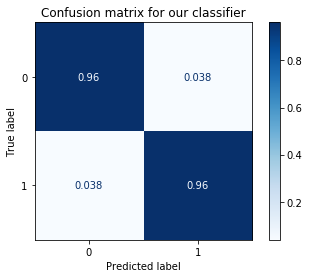

In [15]:
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [16]:
print(f1_score(y_train, clf.predict(X_train)))

0.9728785510710674


In [17]:
print(f1_score(y_test, clf.predict(X_test)))

0.9619883040935673


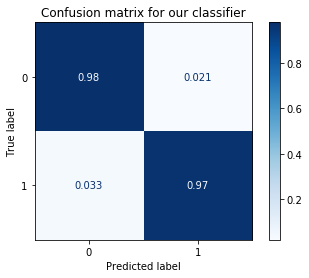

In [18]:
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(clf, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [19]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5443
           1       0.98      0.97      0.97      5472

    accuracy                           0.97     10915
   macro avg       0.97      0.97      0.97     10915
weighted avg       0.97      0.97      0.97     10915



In [20]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1361
           1       0.96      0.96      0.96      1368

    accuracy                           0.96      2729
   macro avg       0.96      0.96      0.96      2729
weighted avg       0.96      0.96      0.96      2729



In [21]:
f = np.array(extract_features('https://www.ramramram.com/'))[temp].reshape(1,-1)
clf.predict(f)

array([0], dtype=int64)